In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
df = prepare_data('./VIXdata.txt')

/Users/gaoxiancheng/anaconda3/envs/papers/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [4]:
def prepare_data(path):
    df = pd.read_csv(path)
    df.columns = ['Date_vix']
    df['Date'] = df['Date_vix'].apply(lambda x: x[0:8])
    df['vix'] = df['Date_vix'].apply(lambda x: x[9:])
    df['vix'] = df['vix'].apply(lambda x: str.replace(x, ' ', ''))
    df['vix'] = df['vix'].apply(lambda x: 0.0 if x == '.' else x)
    df['vix'] = df['vix'].astype(float)
    df['log_vix'] = np.log(df['vix'])
    df['Date'] = pd.to_datetime(df['Date'])
    return df

In [208]:
df['Date_shift'] = df['Date'].shift(-4230)
df 

,Date_vix,Date,vix,log_vix,log_vix_diff,diff2,Date_shift
4,20010104 26.97,2001-01-04,26.97,3.294725,0.013814,0.101125,2017-10-27
6,20010105 28.67,2001-01-05,28.67,3.355851,0.061126,-0.024004,2017-10-30
8,20010108 29.84,2001-01-08,29.84,3.395850,0.039998,-0.107448,2017-10-31
10,20010109 27.99,2001-01-09,27.99,3.331847,-0.064002,-0.081860,2017-11-01
12,20010110 26.80,2001-01-10,26.80,3.288402,-0.043445,-0.087283,2017-11-02
...,...,...,...,...,...,...,...
6183,20220721 23.11,2022-07-21,23.11,3.140265,-0.032776,0.010760,NaT
6184,20220722 23.03,2022-07-22,23.03,3.136798,-0.003468,0.069601,NaT
6185,20220725 23.36,2022-07-25,23.36,3.151025,0.014227,-0.005150,NaT
6186,20220726 24.69,2022-07-26,24.69,3.206398,0.055373,-0.100467,NaT


In [7]:
df = df.drop_duplicates()
df.head()

,Date_vix,Date,vix,log_vix
0,20010102 29.99,2001-01-02,29.99,3.400864
2,20010103 26.60,2001-01-03,26.60,3.280911
4,20010104 26.97,2001-01-04,26.97,3.294725
6,20010105 28.67,2001-01-05,28.67,3.355851
8,20010108 29.84,2001-01-08,29.84,3.395850


In [8]:
df = df[df['vix']>0]
df['log_vix_diff'] = df['log_vix'].diff()
df.dropna(inplace=True)
df.head()

,Date_vix,Date,vix,log_vix,log_vix_diff
2,20010103 26.60,2001-01-03,26.60,3.280911,-0.119953
4,20010104 26.97,2001-01-04,26.97,3.294725,0.013814
6,20010105 28.67,2001-01-05,28.67,3.355851,0.061126
8,20010108 29.84,2001-01-08,29.84,3.395850,0.039998
10,20010109 27.99,2001-01-09,27.99,3.331847,-0.064002


In [9]:
df.tail()

,Date_vix,Date,vix,log_vix,log_vix_diff
6185,20220725 23.36,2022-07-25,23.36,3.151025,0.014227
6186,20220726 24.69,2022-07-26,24.69,3.206398,0.055373
6187,20220727 23.24,2022-07-27,23.24,3.145875,-0.060523
6188,20220728 22.33,2022-07-28,22.33,3.105931,-0.039944
6189,20220729 21.33,2022-07-29,21.33,3.060115,-0.045817


<function matplotlib.pyplot.show(close=None, block=None)>

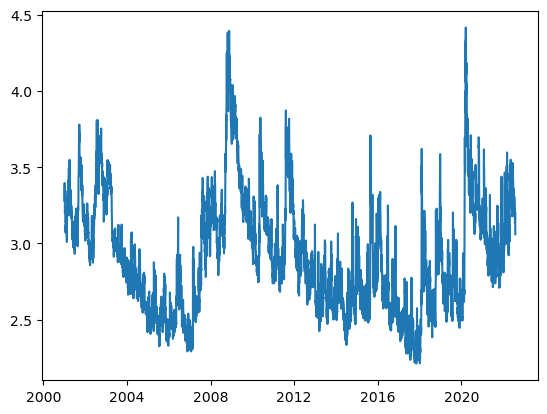

In [11]:
plt.plot(df['Date'],df['log_vix'])
plt.show

In [28]:
df['diff2']=df['log_vix'].diff(2)
df['diff2']=df['diff2'].shift(-2)
df.dropna(inplace=True)
df.head()

,Date_vix,Date,vix,log_vix,log_vix_diff,diff2
4,20010104 26.97,2001-01-04,26.97,3.294725,0.013814,0.101125
6,20010105 28.67,2001-01-05,28.67,3.355851,0.061126,-0.024004
8,20010108 29.84,2001-01-08,29.84,3.395850,0.039998,-0.107448
10,20010109 27.99,2001-01-09,27.99,3.331847,-0.064002,-0.081860
12,20010110 26.80,2001-01-10,26.80,3.288402,-0.043445,-0.087283


In [36]:
df.tail()

,Date_vix,Date,vix,log_vix,log_vix_diff,diff2
6183,20220721 23.11,2022-07-21,23.11,3.140265,-0.032776,0.010760
6184,20220722 23.03,2022-07-22,23.03,3.136798,-0.003468,0.069601
6185,20220725 23.36,2022-07-25,23.36,3.151025,0.014227,-0.005150
6186,20220726 24.69,2022-07-26,24.69,3.206398,0.055373,-0.100467
6187,20220727 23.24,2022-07-27,23.24,3.145875,-0.060523,-0.085760


<function matplotlib.pyplot.show(close=None, block=None)>

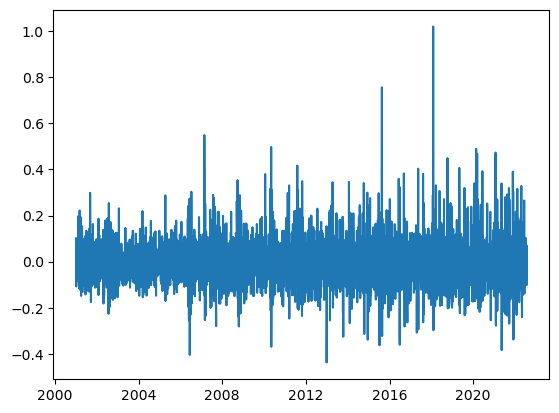

In [31]:
plt.plot (df['Date'],df['diff2'])
plt.show

In [37]:
len(df['Date'])

5427

In [39]:
def psixy(val1,val2):
    if np.sign(val1) ==np.sign(val2):
      psixy=1
    else:
      psixy=0
    return psixy

    

In [40]:
# A <= k <= n-A # computing IBS at kkkkkkkkkk
def IBSA(val_X,val_k,val_A):
    IBSA1=[]
    for j in range(val_k,val_k+val_A):
        IBSA1.append(psixy(val_X[j],val_X[j+1]))
    IBSA=np.sum(IBSA1)/val_A
    return IBSA

In [42]:
IBSA(df['diff2'].values,200,60)

0.6833333333333333

# 1. Window size = 100 days

In [130]:
A=100
n=5427
IBDlist=[]

for i in range(1,54):
    IBDlist.append(IBSA(df['diff2'].values,A*i,A)-IBSA(df['diff2'].values,A*i-A,A))
IBDlist


[0.09999999999999998,
 -0.04999999999999993,
 -0.09000000000000008,
 0.0,
 0.0,
 0.07000000000000006,
 0.029999999999999916,
 -0.039999999999999925,
 -0.010000000000000009,
 0.030000000000000027,
 -0.06000000000000005,
 -0.010000000000000009,
 -0.020000000000000018,
 0.09000000000000008,
 -0.030000000000000027,
 -0.010000000000000009,
 0.0,
 0.010000000000000009,
 -0.010000000000000009,
 -0.06999999999999995,
 0.09999999999999998,
 0.020000000000000018,
 -0.030000000000000027,
 -0.010000000000000009,
 -0.030000000000000027,
 0.020000000000000018,
 0.010000000000000009,
 0.030000000000000027,
 -0.010000000000000009,
 -0.08000000000000007,
 0.10999999999999999,
 0.040000000000000036,
 -0.09999999999999998,
 0.030000000000000027,
 0.04999999999999993,
 -0.09999999999999998,
 0.020000000000000018,
 0.0,
 0.06999999999999995,
 -0.12,
 0.030000000000000027,
 0.0,
 0.07000000000000006,
 -0.040000000000000036,
 0.06999999999999995,
 -0.05999999999999994,
 -0.010000000000000009,
 0.059999999999

In [131]:
np.size(IBDlist) ### 一共53 个点

53

In [132]:


D1=pd.DataFrame(IBDlist,columns=list('A'))
D1[(np.abs(D1.A)>0.09)]


,A
0,0.10
2,-0.09
13,0.09
20,0.10
30,0.11
32,-0.10
35,-0.10
39,-0.12
52,-0.11


In [120]:
# 2. Window size =60 days

# 2. Window size =60 days

In [119]:
# 2. Window size =60 days

In [136]:
A=60
n=5427
IBDlist=[]

for i in range(1,90):
    IBDlist.append(IBSA(df['diff2'].values,A*i,A)-IBSA(df['diff2'].values,A*i-A,A))
IBDlist

[-0.04999999999999993,
 0.15000000000000002,
 -0.10000000000000009,
 0.01666666666666672,
 -0.1166666666666667,
 0.06666666666666665,
 -0.06666666666666665,
 0.033333333333333326,
 -0.016666666666666607,
 0.06666666666666665,
 0.06666666666666665,
 -0.050000000000000044,
 -0.033333333333333326,
 0.033333333333333326,
 -0.06666666666666665,
 0.15000000000000002,
 -0.16666666666666663,
 0.08333333333333326,
 -0.06666666666666665,
 0.01666666666666672,
 -0.033333333333333326,
 0.033333333333333326,
 -0.01666666666666672,
 0.06666666666666665,
 -0.016666666666666607,
 -0.01666666666666672,
 -0.033333333333333326,
 0.0,
 0.08333333333333337,
 -0.050000000000000044,
 -0.016666666666666607,
 0.016666666666666607,
 -0.04999999999999993,
 0.0,
 0.09999999999999998,
 -0.033333333333333326,
 -0.01666666666666672,
 -0.033333333333333326,
 0.15000000000000002,
 -0.1333333333333333,
 0.016666666666666607,
 0.0,
 -0.033333333333333326,
 0.050000000000000044,
 0.04999999999999993,
 -0.1166666666666665

In [137]:
np.size(IBDlist) ### 一共89 个点

89

In [169]:
D1=pd.DataFrame(IBDlist,columns=list('A'))
D1[(np.abs(D1.A)>0.12)]

,A
1,0.150000
15,0.150000
16,-0.166667
38,0.150000
39,-0.133333
51,0.133333
54,-0.200000
57,0.166667
58,-0.166667
65,0.150000


In [173]:
i=[1,15,16,38,39,51,54,57,58,65,66,88]

In [174]:
i=np.array([1,15,16,38,39,51,54,57,58,65,66,88])
(i+1)*60

array([ 120,  960, 1020, 2340, 2400, 3120, 3300, 3480, 3540, 3960, 4020,
       5340])

In [146]:
(i+2)*60

array([ 180, 1020, 1080, 2400, 3360, 3540, 3600, 4020, 4080])

# 3. Window size = 45 days

In [189]:
A=45
n=5427
IBDlist=[]

for i in range(1,120):
    IBDlist.append(IBSA(df['diff2'].values,A*i,A)-IBSA(df['diff2'].values,A*i-A,A))
IBDlist

[0.022222222222222254,
 0.022222222222222143,
 0.13333333333333341,
 -0.0888888888888889,
 -0.0888888888888889,
 0.022222222222222254,
 -0.06666666666666676,
 0.04444444444444451,
 -0.022222222222222254,
 -0.0444444444444444,
 0.06666666666666665,
 -0.022222222222222254,
 -0.022222222222222254,
 0.0888888888888889,
 0.0888888888888889,
 -0.11111111111111105,
 0.0444444444444444,
 -0.022222222222222254,
 -0.0444444444444444,
 0.0,
 0.022222222222222254,
 0.11111111111111105,
 -0.19999999999999996,
 0.1333333333333333,
 -0.15555555555555556,
 0.06666666666666665,
 0.0888888888888889,
 -0.11111111111111116,
 0.04444444444444451,
 -0.06666666666666665,
 0.0888888888888889,
 0.0444444444444444,
 -0.06666666666666665,
 0.06666666666666665,
 -0.0888888888888889,
 -0.022222222222222254,
 0.06666666666666676,
 -0.04444444444444451,
 0.0888888888888889,
 -0.11111111111111116,
 0.11111111111111116,
 -0.0888888888888889,
 0.04444444444444451,
 -0.022222222222222254,
 -0.04444444444444451,
 -0.0222

In [190]:
np.size(IBDlist) ### 一共119 个点

119

In [197]:
D1=pd.DataFrame(IBDlist,columns=list('A'))
D1[(np.abs(D1.A)>0.14)]

,A
22,-0.200000
24,-0.155556
46,0.155556
51,0.200000
68,0.200000
72,-0.177778
87,0.222222
88,-0.200000
93,0.155556


In [202]:
i=np.array([22,24,46,51,68,72,87,88,93])
(i+1)*45

array([1035, 1125, 2115, 2340, 3105, 3285, 3960, 4005, 4230])

# 4. Window size =30 days

In [198]:
A=30
n=5427
IBDlist=[]

for i in range(1,180):
    IBDlist.append(IBSA(df['diff2'].values,A*i,A)-IBSA(df['diff2'].values,A*i-A,A))
IBDlist

[0.1333333333333333,
 -0.16666666666666663,
 0.09999999999999998,
 0.06666666666666665,
 0.06666666666666676,
 -0.10000000000000009,
 -0.06666666666666665,
 0.033333333333333326,
 0.033333333333333326,
 -0.09999999999999998,
 -0.06666666666666665,
 0.06666666666666665,
 0.06666666666666665,
 -0.09999999999999998,
 0.0,
 0.06666666666666665,
 -0.06666666666666665,
 0.1333333333333333,
 -0.23333333333333328,
 0.1333333333333333,
 0.09999999999999998,
 -0.033333333333333326,
 0.10000000000000009,
 -0.13333333333333341,
 0.06666666666666665,
 -0.033333333333333326,
 -0.06666666666666665,
 0.033333333333333326,
 0.06666666666666665,
 -0.06666666666666665,
 -0.06666666666666665,
 0.1333333333333333,
 0.10000000000000009,
 -0.16666666666666674,
 -0.09999999999999998,
 0.16666666666666663,
 -0.06666666666666665,
 -0.1333333333333333,
 0.19999999999999996,
 -0.1333333333333333,
 0.09999999999999998,
 -0.033333333333333326,
 -0.09999999999999998,
 0.09999999999999998,
 -0.033333333333333326,
 -0

In [199]:
np.size(IBDlist) ### 一共179 个点

179

In [201]:
D1=pd.DataFrame(IBDlist,columns=list('A'))
D1[(np.abs(D1.A)>0.2)]

,A
18,-0.233333
66,-0.233333
76,-0.266667
77,0.300000
107,0.200000
109,-0.233333
123,-0.266667
124,0.233333
131,0.300000
132,-0.200000


In [183]:
i=np.array([18,66,76,77,107,109,123,124,131,132,140,141,149])
(i+1)*30

array([ 570, 2010, 2310, 2340, 3240, 3300, 3720, 3750, 3960, 3990, 4230,
       4260, 4500])